![Astrofisica Computacional](../logo.PNG)

---
## 01. Interpolación de Funciones


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

## Interpolación 

### Resumen

En este cuaderno se presentan algunas de las técnicas de interpolación de una función.

---

## Interpolación

Los datos astrofísicos (experimentales y sintéticos) usualmente consiten de un conjunto de valores discretos con la forma $(x_j, f_j)$ en donde se representa el valor de una función $f(x)$ paa un conjunto finito de argumentos $\{ x_0, x_1, x_2, ..., x_{n} \}$. Sin embargo, en muchas ocasiones se necesita conocer el valor de la función en puntos adicionales (que no pertenecen al conjunto dado). La **interpolación** es el método que permite obtener estos valores.

Por **interpolación** entenderemos el definir una función $g(x)$, utilizando la información discreta conocida y de tal forma que $g(x_j) = f(x_j)$ y que se aproxime el valor de la función $f$ en cualquier punto $x \in [x_{min}, x_{max}]$, done $x_{min} = \min [x_j]$ y $x_{max} = \max \{ x_j \}$. 

Por otro lado, la **extrapolación** correspondería a aproximar el valor de la función $f$ en un punto $x \notin [x_{min}, x_{max}]$}. Sin embargo, este caso no será analizado aquí.
 
--- 
## Interpolación Lineal Simple 

El método de interpolación más simple es denominado **Interpolación Polinomial** y consiste en encontrar un polinomio $p_n(x)$ de grado $n$ que pasa por $N = n+1$ puntos $x_j$ tomando los valores $p(x_j) = f(x_j)$, donde $j=0,1,2,...,n$. 

El polinomio se escribe en la forma general

$p_n(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n$

donde $a_i$ son $n+1$-constantes reales que se determinarán por las condiciones

$\left( 
\begin{array}{ccccc}
1&x_0^1&x_0^2&\cdots&x_0^n\\
\vdots&\vdots&\vdots&\vdots&\vdots\\
\vdots&\vdots&\vdots&\vdots&\vdots\\
1&x_n^1&x_n^2&\cdots&x_n^n\\
\end{array}
\right)
\left(\begin{array}{c}
a_0\\
\vdots\\
\vdots\\
a_n
\end{array}\right)
=
\left(\begin{array}{c}
f(x_0)\\
\vdots\\
\vdots\\
f(x_n)
\end{array}\right)$

La solución de este sistema es fácil de obtener en los casos de interpolación lineal ($n=1$) y cuadrática  ($n=2$), pero puede ser dificil de encontrar para un valor grande de $n$. 

---
###  Interpolación Lineal

La interpolación lineal ($n=1$) de una función $f(x)$ en un intervalo
$[x_i,x_{i+1}]$ requiere conocer solamente  dos puntos.

Resolviendo el sistema lineal resultante se obtiene el polinomio interpolado

\begin{equation}
p_1(x) = f(x_i) + \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} (x-x_i) + \mathcal{O}(\Delta x^2)
\end{equation}

donde $\Delta x = x_{i+1} - x_i$.

El método de interpolación lineal provee un polinomio con una precisión de segundo orden que puede ser derivado una vez, pero esta derivada no es continua en los puntos extremos del intervalo de interpolación, $x_i$ y $x_{i+1}$.

#### Ejemplo. Interpolación Lineal por intervalos

A continuación se leerá un conjunto de datos desde un archivo .txt y se interpolará linealmente entre cada par de puntos (*piecewise interpolation*)

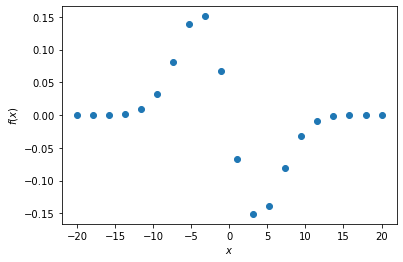

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

plt.figure()
plt.scatter(x,f)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

In [2]:
data.shape

(20, 2)

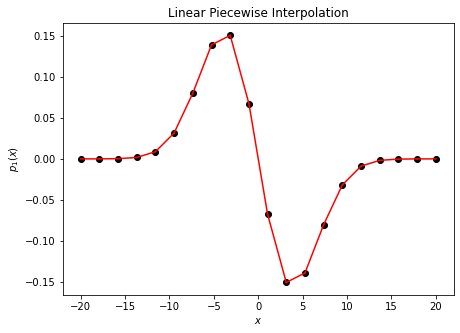

In [3]:
def linearInterpolation(x1, x2, f1, f2, x):
    p1 = f1 + ((f2-f1)/(x2-x1))*(x-x1)
    return p1
    
N = len(x)

plt.figure(figsize=(7,5))
plt.scatter(x, f, color='black')

for i in range(N-1):
    x_interval = np.linspace(x[i],x[i+1],3) 
    # Note that the number 3 in thie above line indeicates the number of 
    # points interpolated in each interval !
    # (including the extreme points of the interval)
    y_interval = linearInterpolation(x[i], x[i+1], f[i], f[i+1], x_interval)
    plt.plot(x_interval, y_interval,'r')
    
plt.title(r'Linear Piecewise Interpolation')
plt.xlabel(r'$x$')
plt.ylabel(r'$p_1(x)$')
plt.show()

---
###  Interpolación Cuadrática

La interpolación cuadrática ($n=2$) requiere información de tres puntos.

Por ejemplo, se pueden tomar los tres puntos $x_i$ , $x_{i+1}$ y $x_{i+2}$ para interpolar la función $f(x)$ en el rango$[x_{i},x_{i+1}]$. Al solucionar el sistema de ecuaciones lineales correspondiente se obtiene el polinomio

$p_2(x) = \frac{(x-x_{i+1})(x-x_{i+2})}{(x_i - x_{i+1})(x_i - x_{i+2})} f(x_i)
+ \frac{(x-x_{i})(x-x_{i+2})}{(x_{i+1} - x_{i})(x_{i+1} - x_{i+2})} f(x_{i+1}) 
+ \frac{(x-x_i)(x-x_{i+1})}{(x_{i+2} - x_i)(x_{i+2} - x_{i+1})} f(x_{i+2}) + \mathcal{O}(\Delta x^3)$,

donde $\Delta x = \max \{ x_{i+2}-x_{i+1},x_{i+1}-x_i \}$. 

En este caso, el polinomio interpolado se puede derivar dos veces pero, aunque su primera derivada es continua, la segunda derivada no es continua en los puntos extremos del intervalo.

#### Ejemplo. Interpolación Cuadrática por Intervalos

A continuación se leerá un conjunto de datos desde un archivo .txt y se interpolará cuadráticamente en sub-intervalos (*quadratic piecewise interpolation*)

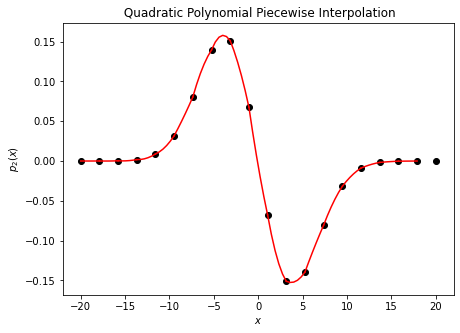

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Reading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

def quadraticInterpolation(x1, x2, x3, f1, f2, f3, x):
    p2 = (((x-x2)*(x-x3))/((x1-x2)*(x1-x3)))*f1 +\
    (((x-x1)*(x-x3))/((x2-x1)*(x2-x3)))*f2 +\
    (((x-x1)*(x-x2))/((x3-x1)*(x3-x2)))*f3
    return p2
    
N = len(x)

plt.figure(figsize=(7,5))
plt.scatter(x, f, color='black')

for i in range(N-2):
    x_interval = np.linspace(x[i],x[i+1],6) # 6 interpolate points in each interval
    y_interval = quadraticInterpolation(x[i], x[i+1], x[i+2], f[i], f[i+1], f[i+2], x_interval)
    plt.plot(x_interval, y_interval,'r')

plt.title(r' Quadratic Polynomial Piecewise Interpolation')
plt.xlabel(r'$x$')
plt.ylabel(r'$p_2(x)$')
plt.show()

**Nota:** Por la forma de realizar la interpolación cuadrática, el último intervalo queda sin información. En esta región se puede extender la interpolación del penúltimo intervalo o también se puede interpolar un polinomio lineal. 

---
## Interpolación de Lagrange 

La **Interpolación de Lagrange Interpolation** también busca un polinomio de grado $n$ utilizando $n+1$ puntos, pero utiliza un método alternativo de encontrar los coeficientes. Para comprender esta idea, re-escribimos el polinomio lineal encontrado antes en la forma

\begin{equation} 
p_1(x) = \frac{x-x_{i+1}}{x_i - x_{i+1}} f(x_i) + \frac{x-x_i}{x_{i+1}-x_i} f(x_{i+1}) + \mathcal{O}(\Delta x^2),
\end{equation} 

o así,

\begin{equation} 
p_1(x) = \sum_{j=i}^{i+1} f(x_j) L_{1j}(x) + \mathcal{O}(\Delta x^2) 
\end{equation}

donde se han introducido los *coeficientes de Lagrange*

\begin{equation} 
L_{1j}(x) = \frac{x-x_k}{x_j-x_k}\bigg|_{k\ne j}.
\end{equation} 

Nótese que estos coeficientes aseguran que el polinomio pasa por los puntos conocidos, i.e. $p_1(x_i) = f(x_i)$ y $p_1(x_{i+1}) = f(x_{i+1})$

La **interpolación de Lagrange** generaliza estas expresiones para un polinomio de grado $n$ que pasa por los $n+1$ puntos conocidos,

\begin{equation}
p_n (x) = \sum_{j=0}^{n} f(x_j) L_{nj}(x) + \mathcal{O}(\Delta x^{n+1})\,, \label{eq:LagrangeInterpolation}
\end{equation}

donde los coeficientes de Lagrange se generalizan a 

\begin{equation}
L_{nj}(x) = \prod_{k\ne j}^{n} \frac{x-x_k}{x_j - x_k}\,.
\end{equation}

De nuevo, es posible notar que estos coeficientes aseguran que el polinomio pasa por los puntos concidos $p(x_j) = f(x_j)$.

In [5]:
# %load lagrangeInterpolation
'''
Eduard Larrañaga
Computational Astrophysics 
2020

Lagrange Interpolation Method
'''

import numpy as np

#Lagrange Coefficients
def L(x, xi, j):
	'''
	------------------------------------------
	L(x, xi, j)
	------------------------------------------
    Returns the Lagrange coefficient for the 
    interpolation evaluated at points x
    Receives as arguments:
    x : array of points where the interpolated
    polynomial will be evaluated
    xi : array of N data points 
    j : index of the coefficient to be 
    calculated
	------------------------------------------
	'''
	# Number of points
	N = len(xi) 

	prod = 1
	for k in range(N):
		if (k != j):
			prod = prod * (x - xi[k])/(xi[j] - xi[k])
	return prod





# Interpolated Polynomial
def p(x, xi, fi):
	'''
	------------------------------------------
    p(x, xi, fi)
    ------------------------------------------
    Returns the values of the Lagrange 
    interpolated polynomial in a set of points
    defined by x
    x : array of points where the interpolated
    polynomial will be evaluated
    xi : array of N data points points
    fi : values of the function to be 
    interpolated
    ------------------------------------------
	'''
	# Number of points
	N = len(xi)

	summ = 0
	for j in range(N):
		summ = summ + fi[j]*L(x, xi, j)
	return summ


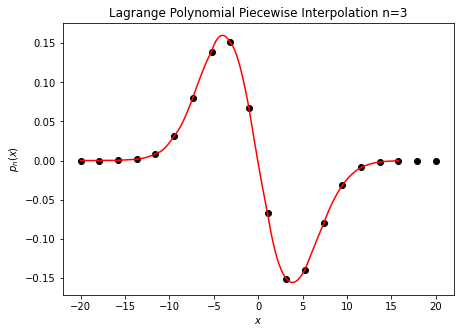

In [10]:
import numpy as np
import matplotlib.pyplot as plt
#import lagrangeInterpolation as lagi
import sys

# Reading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]
    
N = len(x)

# Degree of the polynomial to be interpolated piecewise
n = 3

# Check if the number of point is enough to interpolate such a polynomial
if n>=N:
    print('\nThere are not enough points to interpolate this polynomial.')
    print(f'Using {N:.0f} points it is possible to interpolate polynomials up to order n={N-1:.0f}')
    sys.exit()

    
plt.figure(figsize=(7,5))
plt.title(f'Lagrange Polynomial Piecewise Interpolation n={n:.0f}')
plt.scatter(x, f, color='black')

# Piecewise Interpolation Loop
for i in range(N-n):
    xi = x[i:i+n+1]
    fi = f[i:i+n+1]
    x_interval = np.linspace(x[i],x[i+1],3*n)
    y_interval = p(x_interval,xi,fi)
    plt.plot(x_interval, y_interval,'r')

plt.xlabel(r'$x$')
plt.ylabel(r'$p_n(x)$')
plt.show()

Nótese que los últimos $n$ puntos no estan interpolados. Qué se puede hacer?

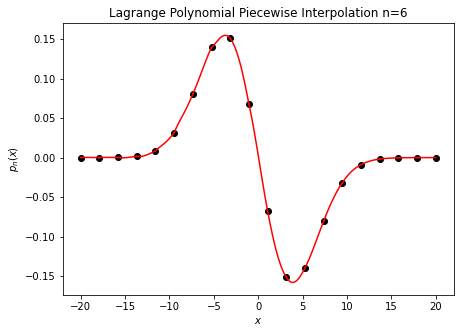

In [12]:
import numpy as np
import matplotlib.pyplot as plt
#import lagrangeInterpolation as lagi
import sys

# Reading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]
    
N = len(x)

# Degree of the polynomial to be interpolated piecewise
n = 6

# Check if the number of point is enough to interpolate such a polynomial
if n>=N:
    print('\nThere are not enough points to interpolate this polynomial.')
    print(f'Using {N:.0f} points it is possible to interpolate polynomials up to order n={N-1:.0f}')
    sys.exit()

    
plt.figure(figsize=(7,5))
plt.title(f'Lagrange Polynomial Piecewise Interpolation n={n:.0f}')
plt.scatter(x, f, color='black')

# Piecewise Interpolation Loop
for i in range(N-n):
    xi = x[i:i+n+1]
    fi = f[i:i+n+1]
    x_interval = np.linspace(x[i],x[i+1],3*n)
    y_interval = p(x_interval,xi,fi)
    plt.plot(x_interval, y_interval,'r')

# Piecewise Interpolation for the final N-n points, 
# using a lower degree polynomial
while n>1:
    m = n-1
    for i in range(N-n,N-m):
        xi = x[i:i+m+1]
        fi = f[i:i+m+1]
        x_interval = np.linspace(x[i],x[i+1],3*m)
        y_interval = p(x_interval,xi,fi)
        plt.plot(x_interval, y_interval,'r')
    n=n-1


plt.xlabel(r'$x$')
plt.ylabel(r'$p_n(x)$')
plt.show()

### Fenómeno de Runge

Por qué se se interpola por sub-intervalos? Cuando se tiene una gran cantidad de puntos conocidos, es posible interpolar un polinomio de grado alto. Sin embargo, el comportamiento del polinomio interpolado puede no ser el esperado (especialmente en los extremos del intervalo de interpolación) debido a la existencia de oscilaciones no controladas. A este comportamiento se le denomina el fenómeno de Runge.

Por ejemplo, para un conjunto de datos con $20$ puntos es posible interpolar un polinomio de orden $n=19$,

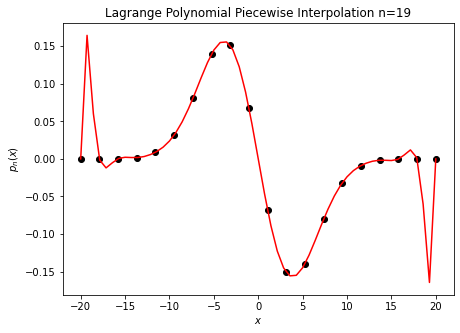

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import lagrangeInterpolation as lagi
import sys

# Reading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]
    
N = len(x)

# Higher Degree polynomial to be interpolated 
n = N-1

plt.figure(figsize=(7,5))
plt.title(f'Lagrange Polynomial Piecewise Interpolation n={n:.0f}')
plt.scatter(x, f, color='black')

#Interpolation of the higher degree polynomial
x_int = np.linspace(x[0],x[N-1],3*n)
y_int = lagi.p(x_int,x,f)
plt.plot(x_int, y_int,'r')

plt.xlabel(r'$x$')
plt.ylabel(r'$p_n(x)$')
plt.show()

Sin embargo, es claro que el comportamiento del polinomio interpolado no es bueno en los extremos del intervalo considerado. Por esta razón, es muy aconsejable utilizar una interpolación de polinomios de grado pequeño por sub-intervalos.

---
## Interpolación Cúbica de Hermite por Intervalos

La interpolación de Hermite es unc aso particular de interpolación polinomica que utiliza un conjunto de puntos conocidos en donde se conoce el valor de la función $f(x_j)$ y su derivada $f'(x_j)$. Al incorporar la primera derivada se pueden interpolar polinomios de un grado alto controlando las osiclaciones no deseadas. Adicionalmente, al conocer la primera derivada, se necesitan menos puntos para realizar la interpolación.

Dentro de este tipo de interpolación, la más utilizada es la de polinomios de tercer orden. DE esta forma, en un intervalo $[x_i , x_{i+1}]$, se requiere conocer (o evaluar) los valores de $f(x_i)$, $f(x_{i+1})$, $f'(x_i)$ y $f'(x_{i+1})$ para obtener el polinomio interpolado de Hermite cúbico,

\begin{equation}
H_3(x) = f(x_i)\psi_0(z) + f(x_{i+1})\psi_0(1-z)+ f'(x_i)(x_{i+1} - x_{i})\psi_1(z) - f'(x_{i+1})(x_{i+1}-x_i)\psi_1 (1-z),
\end{equation}

donde 

\begin{equation}
z = \frac{x-x_i}{x_{i+1}-x_i}
\end{equation}

y

\begin{align}
\psi_0(z) =&2z^3 - 3z^2 + 1 \\
\psi_1(z) =&z^3-2z^2+z\,\,.
\end{align}

Nótese que con esta formulación, es posible interpolar un polinomio de tercer orden en un intervalo con solo dos puntos. De esta forma, al trabajar con un conjunto de muhos puntos, se podría interpolar un polinomio cúbico entre cada par de datos, incluso en el último sub-intervalo!

In [14]:
# %load HermiteInterpolation
'''
Eduard Larrañaga
Computational Astrophysics 
2020

Hermite Interpolation Method
'''

import numpy as np

#Hermite Coefficients
def psi0(z):
	'''
	------------------------------------------
	psi0(z)
	------------------------------------------
	Returns the Hermite coefficients Psi_0
	for the interpolation
	Receives as arguments: z
	------------------------------------------
	'''
	psi_0 = 2*z**3 - 3*z**2 + 1
	return psi_0

def psi1(z):
	'''
	------------------------------------------
	psi1(z)
	------------------------------------------
	Returns the Hermite coefficients Psi_1 for 
	the interpolation
	Receives as arguments: z
	------------------------------------------
	'''
	psi_1 = z**3 - 2*z**2 + z
	return psi_1


# Interpolated Polynomial
def H3(x, xi, fi, dfidx):
	'''
	------------------------------------------
    H3(x, xi, fi, dfidx)
    ------------------------------------------
    Returns the values of the Cubic Hermite 
    interpolated polynomial in a set of points
    defined by x
    x : array of points where the interpolated
    polynomial will be evaluated
    xi : array of 2 data points 
    fi : array of values of the function at xi
    dfidx : array of values of the derivative 
    of the function at xi
    ------------------------------------------
	'''
	# variable z in the interpolation
	z = (x - xi[0])/(xi[1] - x[0])
	
	h1 = psi0(z) * fi[0]
	h2 = psi0(1-z)*fi[1]
	h3 = psi1(z)*(xi[1] - xi[0])*dfidx[0]
	h4 = psi1(1-z)*(xi[1] - xi[0])*dfidx[1]
	H =  h1 + h2 + h3 - h4
	return H


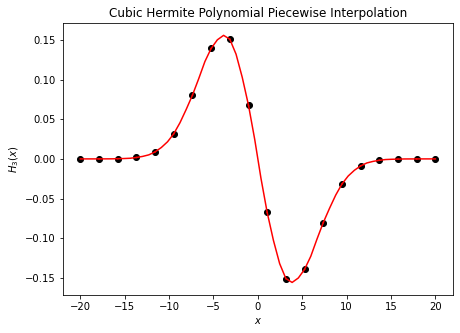

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import HermiteInterpolation as heri

def Derivative(x, f):
    '''
    ------------------------------------------
    Derivative(x, f)
    ------------------------------------------
    This function returns the numerical 
    derivative of a discretely-sample function 
    using one-side derivatives in the extreme 
    points of the interval and second order 
    accurate derivative in the middle points.
    The data points may be evenly or unevenly
    spaced.
    ------------------------------------------
    '''
    # Number of points
    N = len(x)
    dfdx = np.zeros([N, 2])
    dfdx[:,0] = x
    
    # Derivative at the extreme points
    dfdx[0,1] = (f[1] - f[0])/(x[1] - x[0])
    dfdx[N-1,1] = (f[N-1] - f[N-2])/(x[N-1] - x[N-2])
    
    #Derivative at the middle points
    for i in range(1,N-1):
        h1 = x[i] - x[i-1]
        h2 = x[i+1] - x[i]
        dfdx[i,1] = h1*f[i+1]/(h2*(h1+h2)) - (h1-h2)*f[i]/(h1*h2) -\
                    h2*f[i-1]/(h1*(h1+h2))
    
    return dfdx

# Loading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]
N = len(x)

# Calling the derivative function and chosing only the second column
dfdx = Derivative(x,f)[:,1]

plt.figure(figsize=(7,5))
plt.title(f'Cubic Hermite Polynomial Piecewise Interpolation')
plt.scatter(x, f, color='black')

# Piecewise Hermite Interpolation Loop
for i in range(N-1):
    xi = x[i:i+2]
    fi = f[i:i+2]
    dfidx = dfdx[i:i+2]
    x_interval = np.linspace(x[i],x[i+1],4)
    y_interval = heri.H3(x_interval, xi, fi, dfidx)
    plt.plot(x_interval, y_interval,'r')

plt.xlabel(r'$x$')
plt.ylabel(r'$H_3(x)$')
plt.show()
